Credit Card Fraud Detection
This project aims to detect fraud by analyzing credit card transactions. The dataset contains features of credit card transactions and will be used to determine whether a transaction is fraudulent.

Contents
data/: Folder containing the datasets
notebooks/: Jupyter Notebook files for exploratory data analysis (EDA) and modeling
src/: Code files (data processing, modeling, etc.)
results/: Model results and visualizations
README.md: Information about the project

Dataset
The dataset consists of 284,807 credit card transactions and 31 columns. The columns are as follows:
Time: Transaction time
Amount: Transaction amount
Class: Target variable (0 = Not Fraudulent, 1 = Fraudulent)

Data Preprocessing
Missing Values: Missing values were checked and necessary cleaning was performed.
Scaling: The Amount and Time columns were standardized using StandardScaler.

Exploratory Data Analysis (EDA)
Visualizations:
Scatter plot (Transaction amounts over time)
Histogram (Distribution of transaction amounts)
Count plot (Fraudulent vs. non-fraudulent transactions)

Modeling
Model Selection: Basic classification models such as Logistic Regression, Decision Trees, and Random Forests will be used.
Class Imbalance: Class imbalance will be addressed using techniques such as SMOTE or class weighting.
Evaluation: Model performance will be evaluated using Precision, Recall, F1-score, and ROC-AUC metrics.

Libraries Used
pandas: Data processing
numpy: Numerical computations
matplotlib: Visualization
seaborn: Visualization
scikit-learn: Machine learning

In [267]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Klasördeki dosyaları listele
klasor = '/kaggle/input/creditcardfraud'
dosyalar = os.listdir(klasor)
print(dosyalar)

['creditcard.csv']


In [268]:
# Dosya yolunu kullanarak CSV dosyasını okuma
dosya_yolu = '/kaggle/input/creditcardfraud/creditcard.csv'
creditCard_df = pd.read_csv(dosya_yolu)

In [269]:
creditCard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [270]:
creditCard_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [271]:
creditCard_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [272]:
creditCard_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [273]:
# Her sütunun veri tiplerini kontrol edin
print(creditCard_df.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [274]:
creditCard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


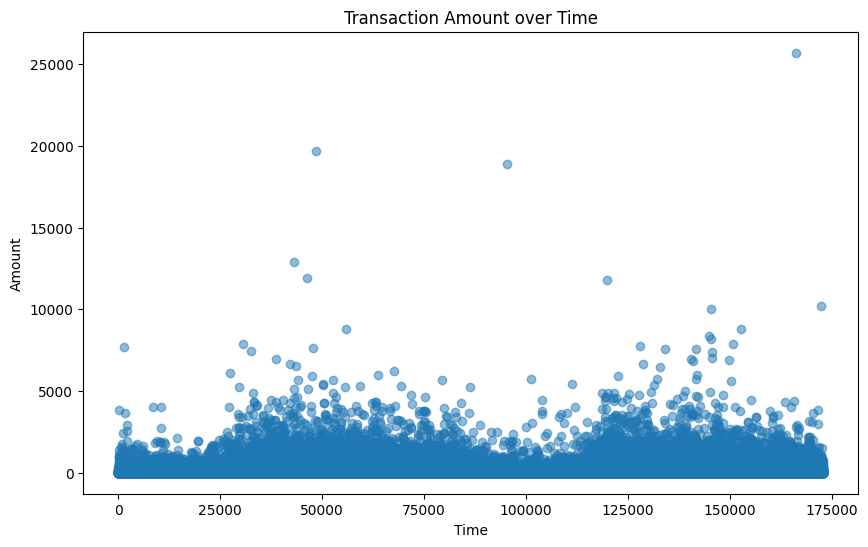

In [275]:
plt.figure(figsize=(10, 6))
plt.scatter(creditCard_df['Time'], creditCard_df['Amount'], alpha=0.5)
plt.title('Transaction Amount over Time')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


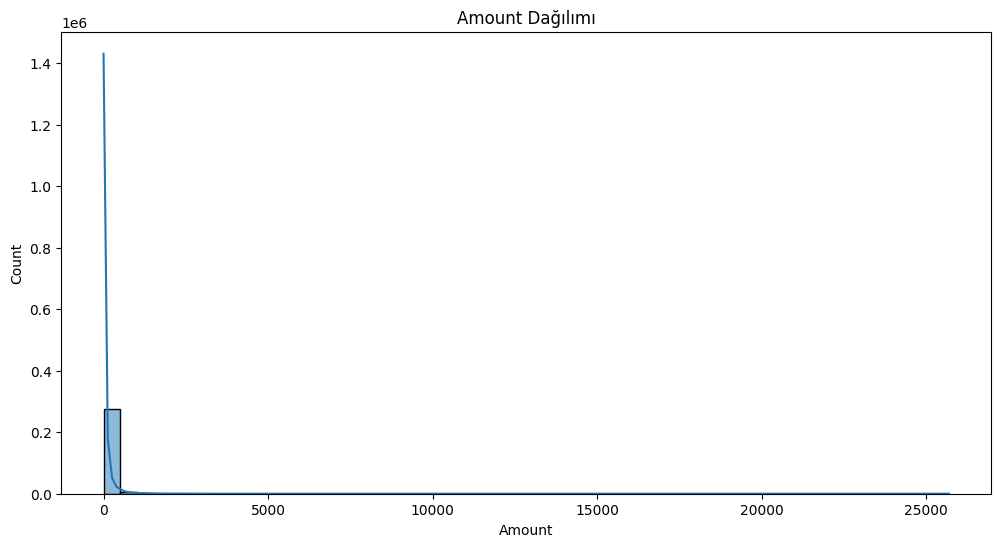

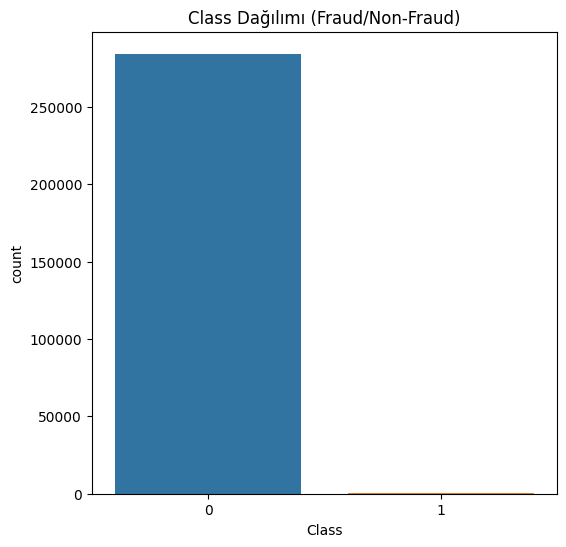

In [276]:
plt.figure(figsize=(12,6))
sns.histplot(creditCard_df['Amount'], bins=50, kde=True)
plt.title('Amount Dağılımı')
plt.show()

plt.figure(figsize=(6,6))
sns.countplot(x='Class', data=creditCard_df)
plt.title('Class Dağılımı (Fraud/Non-Fraud)')
plt.show()

In [277]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
creditCard_df['Amount_Scaled'] = scaler.fit_transform(creditCard_df[['Amount']])
creditCard_df['Time_Scaled'] = scaler.fit_transform(creditCard_df[['Time']])

In [278]:
creditCard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_Scaled,Time_Scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964,-1.996583
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475,-1.996583
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686,-1.996562
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534,-1.996562
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403,-1.996541


In [279]:
print(creditCard_df['Class'].value_counts())


Class
0    284315
1       492
Name: count, dtype: int64


In [280]:
def categorize_time(hour):
    if hour < 6:
        return 'Night'
    elif hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# `Time` sütununu saat dilimlerine dönüştür
creditCard_df['Time_Category'] = creditCard_df['Time'].apply(categorize_time)

In [281]:
def categorize_amount(amount):
    if amount < 20:
        return 'Low'
    elif amount < 100:
        return 'Medium'
    else:
        return 'High'

# `Amount` sütununu kategorilere dönüştür
creditCard_df['Amount_Category'] = creditCard_df['Amount'].apply(categorize_amount)

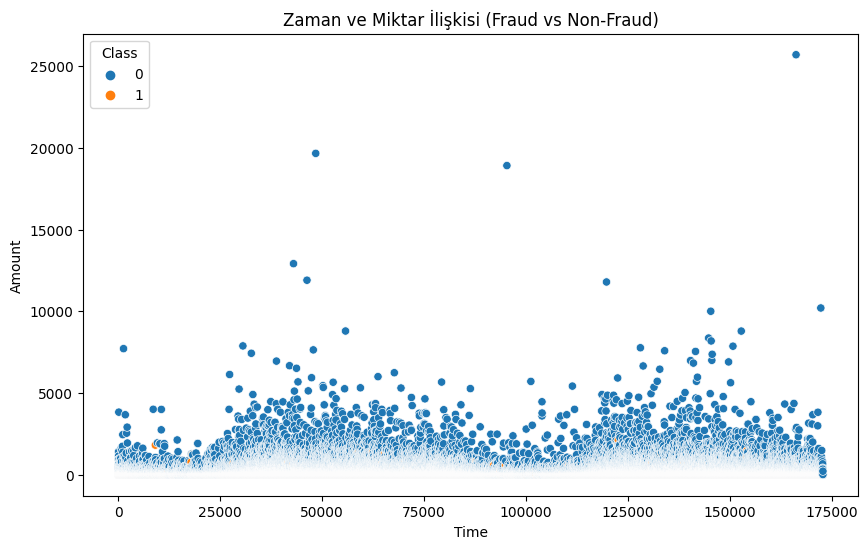

In [282]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=creditCard_df)
plt.title("Zaman ve Miktar İlişkisi (Fraud vs Non-Fraud)")
plt.show()

In [283]:
creditCard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V25,V26,V27,V28,Amount,Class,Amount_Scaled,Time_Scaled,Time_Category,Amount_Category
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964,-1.996583,Night,High
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475,-1.996583,Night,Low
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686,-1.996562,Night,High
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534,-1.996562,Night,High
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403,-1.996541,Night,Medium


In [284]:
# One-Hot Encoding uygula
encoded_df = pd.get_dummies(creditCard_df[['Time_Category', 'Amount_Category']])

# Orijinal veri çerçevesine ekle
creditCard_df = pd.concat([creditCard_df, encoded_df], axis=1)

# Önceki kategorik sütunları veri çerçevesinden çıkar
creditCard_df = creditCard_df.drop(['Time_Category', 'Amount_Category'], axis=1)

# Sonuçları kontrol et
creditCard_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Class,Amount_Scaled,Time_Scaled,Time_Category_Afternoon,Time_Category_Evening,Time_Category_Morning,Time_Category_Night,Amount_Category_High,Amount_Category_Low,Amount_Category_Medium
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0,0.244964,-1.996583,False,False,False,True,True,False,False
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0,-0.342475,-1.996583,False,False,False,True,False,True,False
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0,1.160686,-1.996562,False,False,False,True,True,False,False
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0,0.140534,-1.996562,False,False,False,True,True,False,False
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0,-0.073403,-1.996541,False,False,False,True,False,False,True
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,0,-0.338556,-1.996541,False,False,False,True,False,True,False
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,0,-0.333279,-1.996499,False,False,False,True,False,True,False
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,0,-0.190107,-1.996436,False,False,True,False,False,False,True
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,0,0.019392,-1.996436,False,False,True,False,False,False,True
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,0,-0.338516,-1.996394,False,False,True,False,False,True,False


In [285]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
import pandas as pd
import joblib

# Veri ayırma: Özellikler (X) ve hedef değişken (y)
X = creditCard_df[['Time', 'Amount']]
y = creditCard_df['Class']

# Eğitim ve test kümelerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SMOTE ile veri dengesizliğini çöz
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# XGBoost modelini oluştur
model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, scale_pos_weight=len(y_resampled)/sum(y_resampled))

# GridSearchCV ile hiperparametre optimizasyonu
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200]
}

# Hiperparametre optimizasyonu için grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1')
grid_search.fit(X_resampled, y_resampled)  # Dengeli verileri kullanarak eğitiyoruz

# En iyi modeli bul
best_model = grid_search.best_estimator_

# Test verisi üzerinde tahmin
y_pred = best_model.predict(X_test)

# Performansı değerlendir
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Yeni veriler üzerinde tahmin (örnek)
new_data = pd.DataFrame({
    'Time': [100000, 200000],  # Örnek zaman verileri
    'Amount': [120.50, 320.75]  # Örnek miktar verileri
})

# Yeni veriler üzerinde tahmin yap
new_predictions = best_model.predict(new_data)
print(f"New Predictions: {new_predictions}")

# Modeli kaydet
joblib.dump(best_model, 'credit_card_fraud_model.pkl')

# Modeli kaydettiğini doğrula
print("Model başarıyla kaydedildi: 'credit_card_fraud_model.pkl'")


Accuracy: 0.7280058050396171
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.73      0.84     85307
           1       0.00      0.63      0.01       136

    accuracy                           0.73     85443
   macro avg       0.50      0.68      0.42     85443
weighted avg       1.00      0.73      0.84     85443

New Predictions: [0 0]
Model başarıyla kaydedildi: 'credit_card_fraud_model.pkl'


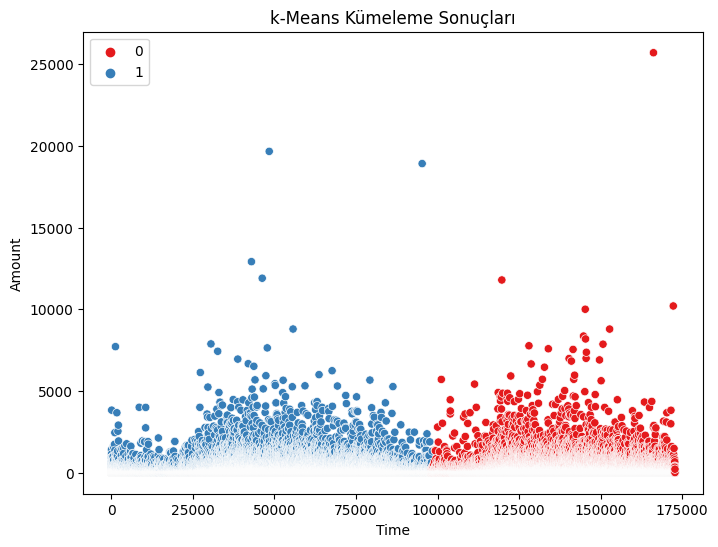

In [286]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Normalleştirilmiş veriler üzerinde çalış (Time ve Amount özellikleri)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X, Time ve Amount verilerini içeren DataFrame

# k-Means modeli oluştur (n_init parametresini ekledik)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Kümeleme sonuçlarını incele
clusters = kmeans.labels_

# Sonuçları görselleştir
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Time'], y=X['Amount'], hue=clusters, palette='Set1')
plt.title('k-Means Kümeleme Sonuçları')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()



In [287]:
import shutil

# Dosya yolu
dosya_yolu = '/kaggle/input/creditcardfraud/creditcard.csv'

# Geçici bir ZIP dosyası oluşturun
shutil.make_archive('/kaggle/working/creditcard_data', 'zip', root_dir='/kaggle/input/creditcardfraud', base_dir='creditcard.csv')

# Klasör yolu
klasor_yolu = '/kaggle/input/creditcardfraud'

# Geçici bir ZIP dosyası oluşturun
shutil.make_archive('/kaggle/working/creditcard_data_all', 'zip', klasor_yolu)

'/kaggle/working/creditcard_data_all.zip'